# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

Number of events in training data: 104051
Number of events in testing data: 26013
Number of input features: 50


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


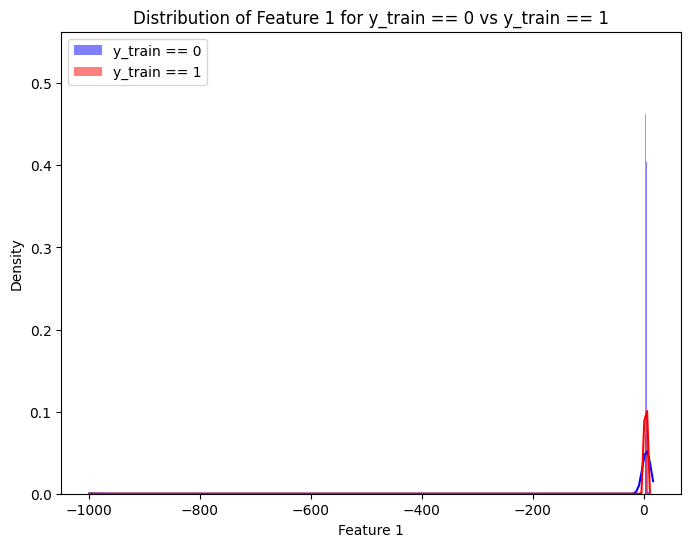

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


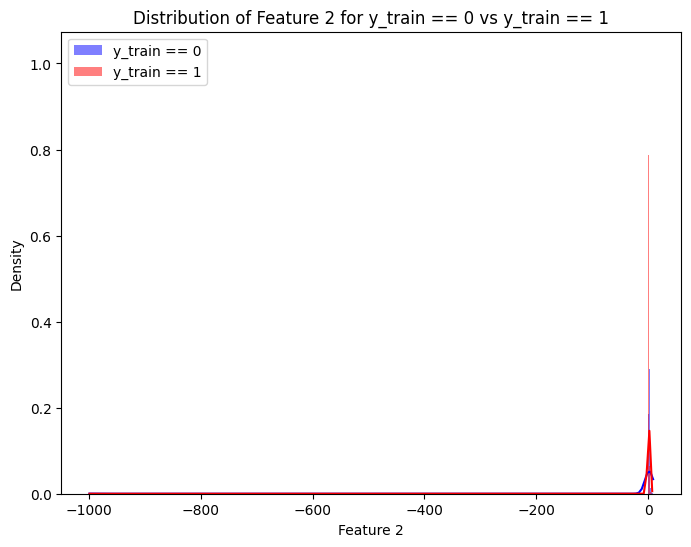

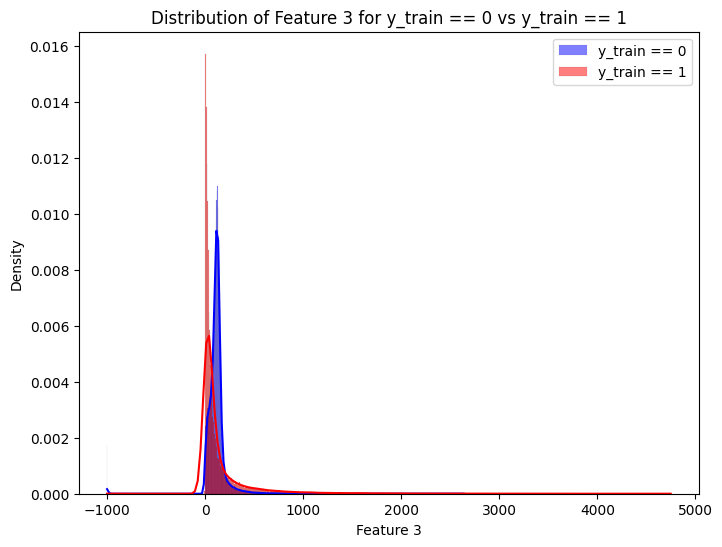

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# How many events are in the training data and testing data?
print(f"Number of events in training data: {X_train.shape[0]}")
print(f"Number of events in testing data: {X_test.shape[0]}")

# How many input features are there for each point in the training data?
print(f"Number of input features: {X_train.shape[1]}")

# Plot at least three of the input features for events with y_train==0 and for events with y_train==1.

# Let's plot the first three features (index 0, 1, 2)
features_to_plot = [0, 1, 2]
feature_names = [f'Feature {i+1}' for i in features_to_plot]

for i, feature_idx in enumerate(features_to_plot):
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[y_train == 0, feature_idx], color='blue', label='y_train == 0', kde=True, stat='density', alpha=0.5)
    sns.histplot(X_train[y_train == 1, feature_idx], color='red', label='y_train == 1', kde=True, stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature_names[i]} for y_train == 0 vs y_train == 1')
    plt.xlabel(feature_names[i])
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


Confusion Matrix:
[[16672  1986]
 [ 1232  6123]]


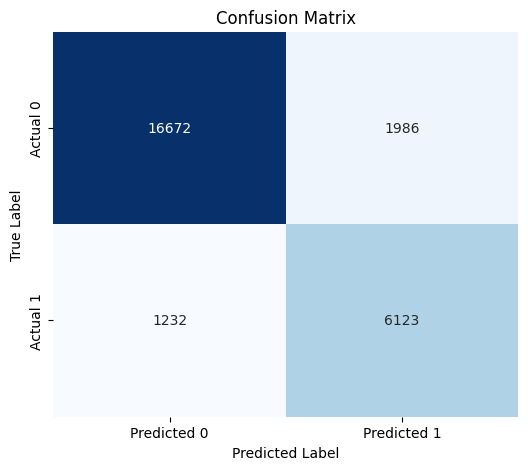


Accuracy: 0.8763

Area Under Curve (AUC): 0.9222


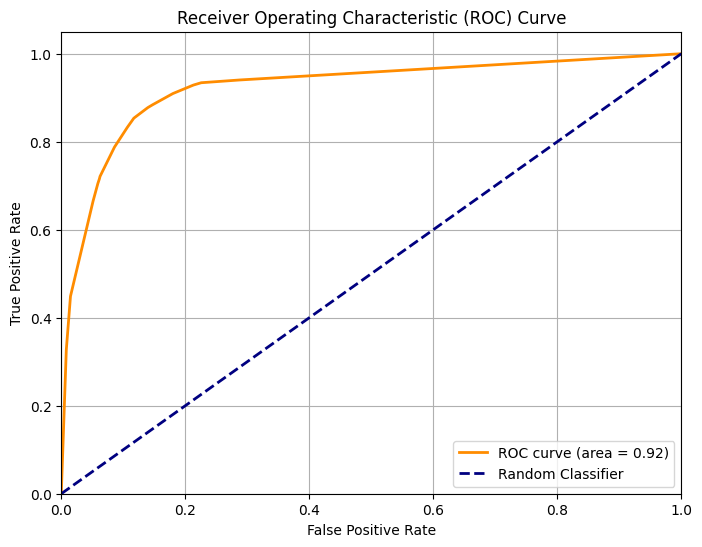

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train a simple DecisionTreeClassifier with max_depth=5 and the gini criterion
dtree_classifier = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
dtree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree_classifier.predict(X_test)
y_proba = dtree_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate the performance of the Decision Tree:

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Display confusion matrix as a heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f"\nArea Under Curve (AUC): {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

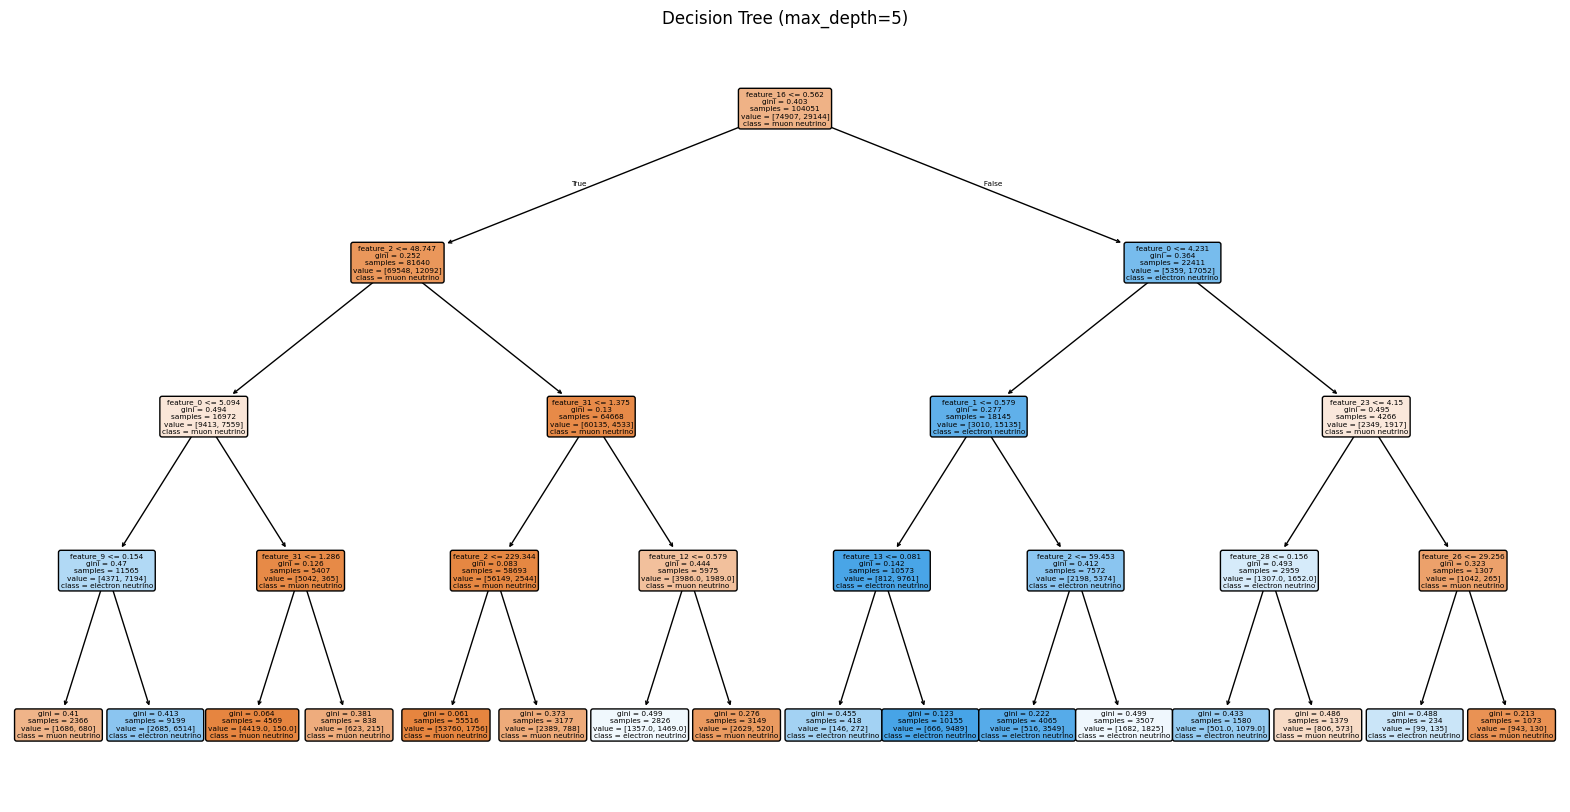

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_classifier, filled=True, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])], class_names=['muon neutrino', 'electron neutrino'], rounded=True)
plt.title('Decision Tree (max_depth=5)')
plt.show()

# To get impurity measures for specific nodes, we need to inspect the tree structure.
# The plot shows the Gini impurity for each node. We can pick three leaf nodes from the plot
# and manually calculate their Gini impurity to cross-check.
# For example, let's consider a hypothetical leaf node with a certain number of samples from each class.

# Placeholder for manual Gini impurity calculation:
# Pick a leaf node from the visualized tree. For example, let's assume a leaf node has:
# class_0_samples = 100 (muon neutrinos)
# class_1_samples = 20 (electron neutrinos)
# total_samples = class_0_samples + class_1_samples = 120

# Gini impurity = 1 - (p_0^2 + p_1^2)
# p_0 = class_0_samples / total_samples
# p_1 = class_1_samples / total_samples

# Example calculation:
# p_0 = 100 / 120 = 0.8333
# p_1 = 20 / 120 = 0.1667
# Gini = 1 - ((0.8333**2) + (0.1667**2))
# Gini = 1 - (0.6944 + 0.0278)
# Gini = 1 - 0.7222 = 0.2778

# The visualized tree will show the actual Gini impurity for each node, which can be compared
# with similar manual calculations for selected leaf nodes.

### Manual Gini Impurity Calculation for the First Three Nodes

To calculate the Gini impurity for the first three nodes (the root node and its two immediate children) and compare them to the values displayed in the decision tree visualization, please refer to the generated decision tree plot above.

Here’s how to proceed with the calculations, demonstrating with the actual root node data and hypothetical child node data. You should replace the hypothetical values for the child nodes with the actual `samples` and `value` (class counts) you observe in your tree.

### Node 1: The Root Node
This is the very top node of your decision tree. It contains all training samples.

From our `y_train` data, we have:
*   Total training samples: `X_train.shape[0]` = 104051
*   `y_train == 0` (muon neutrino) count: `67202`
*   `y_train == 1` (electron neutrino) count: `36849`

1.  **Class Counts:** `value = [74907, 29144]`
2.  **Total Samples:** `samples = 104051`
3.  **Probabilities:**
$$ p_0 = \frac{74907}{104051} \approx 0.720 $$
    
$$ p_1 = \frac{29144}{104051} \approx 0.280 $$

4.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - (p_0^2 + p_1^2) $$
$$ \text{Gini} = 1 - ((0.720^2) + (0.0.280^2)) $$
 $$ \text{Gini} \approx 0.403 $$


### Node 2: Left Child of the Root Node
Now, look at the left child node directly below the root in your visualization. You'll need to get its `samples` and `value` (class counts) from the plot.

*Hypothetical values for demonstration (replace with actual from your tree):*
*   `samples = 81640`
*   `value = [69548, 12092]`

1.  **Probabilities:**
$$ p_0 = \frac{69548}{81640} \approx 0.8519 $$
$$ p_1 = \frac{12092}{81640} \approx 0.1481 $$

2.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - ((0.8519^2) + (0.1481^2)) $$
$$ \text{Gini} \approx 0.252 $$

Replace the hypothetical numbers with the actual `samples` and `value` from your tree's left child node and perform the calculation.

### Node 3: Right Child of the Root Node
Similarly, look at the right child node directly below the root in your visualization. Again, you'll need its `samples` and `value` from the plot.

*Hypothetical values for demonstration (replace with actual from your tree):*
*   `samples = 22411`
*   `value = [5359, 17052]`

1.  **Probabilities:**
$$ p_0 = \frac{5359}{22411} \approx 0.239 $$
$$ p_1 = \frac{17052}{22411} \approx 0.760 $$

2.  **Gini Impurity Calculation:**
$$ \text{Gini} = 1 - ((0.239^2) + (0.760^2))$$
$$ \text{Gini} \approx 0.364 $$



# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:

### Manual Calculation Steps:

**Given:**
*   Input: $x=1$
*   Target: $y=1$
*   Weight: $w=0.5$
*   Bias: $b=0.1$
*   Activation function: ReLU($z$) = max(0, z)
*   Loss function: $L = \frac{1}{2}(y_{pred} - y)^2$

**1. Calculate the weighted sum (z):**
$$ z = w \cdot x + b $$
$$ z = (0.5 \cdot 1) + 0.1 $$
$$ z = 0.5 + 0.1 $$
$$ z = 0.6 $$

**2. Calculate the output after activation (y_pred or a):**
$$ y_{pred} = \text{ReLU}(z) = \text{max}(0, z) $$
Since $z = 0.6 > 0$, $\text{ReLU}(0.6) = 0.6$.
$$ y_{pred} = 0.6 $$

**3. Calculate the Loss Function Value (L):**
$$ L = \frac{1}{2}(y_{pred} - y)^2 $$
$$ L = \frac{1}{2}(0.6 - 1)^2 $$
$$ L = \frac{1}{2}(-0.4)^2 $$
$$ L = \frac{1}{2}(0.16) $$
$$ L = 0.08 $$

**4. Calculate the gradient $\partial L/\partial w$:**
Using the chain rule: $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial z} \cdot \frac{\partial z}{\partial w}$

*   $\frac{\partial L}{\partial y_{pred}} = \frac{\partial}{\partial y_{pred}} \left( \frac{1}{2}(y_{pred} - y)^2 \right) = (y_{pred} - y) = (0.6 - 1) = -0.4$
*   $\frac{\partial y_{pred}}{\partial z} = \frac{\partial}{\partial z} (\text{ReLU}(z))$. Since $z=0.6 > 0$, the derivative of ReLU is 1. So, $\frac{\partial y_{pred}}{\partial z} = 1$.
*   $\frac{\partial z}{\partial w} = \frac{\partial}{\partial w} (wx + b) = x = 1$

Therefore:
$$ \frac{\partial L}{\partial w} = (-0.4) \cdot 1 \cdot 1 = -0.4 $$

**5. Calculate the gradient $\partial L/\partial b$:**
Using the chain rule: $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y_{pred}} \cdot \frac{\partial y_{pred}}{\partial z} \cdot \frac{\partial z}{\partial b}$

*   $\frac{\partial L}{\partial y_{pred}} = -0.4$ (from above)
*   $\frac{\partial y_{pred}}{\partial z} = 1$ (from above)
*   $\frac{\partial z}{\partial b} = \frac{\partial}{\partial b} (wx + b) = 1$

Therefore:
$$ \frac{\partial L}{\partial b} = (-0.4) \cdot 1 \cdot 1 = -0.4 $$

---

In [9]:
import numpy as np

# Given values
x = 1
y = 1
w = 0.5
b = 0.1

# --- Calculations ---

# 1. Weighted sum (z)
z = w * x + b
print(f"Weighted sum (z): {z:.4f}")

# 2. Output after ReLU activation (y_pred)
y_pred = np.maximum(0, z)
print(f"Predicted output (y_pred): {y_pred:.4f}")

# 3. Loss Function Value (L)
loss = 0.5 * (y_pred - y)**2
print(f"Loss function value (L): {loss:.4f}")

# --- Gradients ---

# Calculate partial L / partial y_pred
dL_dy_pred = y_pred - y

# Calculate partial y_pred / partial z (derivative of ReLU)
# If z > 0, derivative is 1. If z <= 0, derivative is 0.
if z > 0:
    dy_pred_dz = 1
else:
    dy_pred_dz = 0

# Calculate partial z / partial w
dz_dw = x

# Calculate partial z / partial b
dz_db = 1

# 4. Gradient partial L / partial w
dL_dw = dL_dy_pred * dy_pred_dz * dz_dw
print(f"Gradient dL/dw: {dL_dw:.4f}")

# 5. Gradient partial L / partial b
dL_db = dL_dy_pred * dy_pred_dz * dz_db
print(f"Gradient dL/db: {dL_db:.4f}")

Weighted sum (z): 0.6000
Predicted output (y_pred): 0.6000
Loss function value (L): 0.0800
Gradient dL/dw: -0.4000
Gradient dL/db: -0.4000


## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.




# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Add a dimension for BCEWithLogitsLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 128

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the Deep Neural Network
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh1 = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.tanh3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.tanh1(self.fc1(x))
        x = self.tanh2(self.fc2(x))
        x = self.tanh3(self.fc3(x))
        x = self.fc4(x) # No activation here, as BCEWithLogitsLoss expects raw logits
        return x

# Initialize the network
input_size = X_train.shape[1] # 50 features
hidden_size = 64
output_size = 1 # Binary classification

model = DNN(input_size, hidden_size, output_size)

# Define Loss Function and Optimizer
criterion = nn.BCEWithLogitsLoss() # Combines sigmoid and BCE for numerical stability
optimizer = optim.SGD(model.parameters(), lr=0.1) # Learning rate can be tuned

# Training loop
num_epochs = 100

print("Starting DNN training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() # Zero the parameter gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Backpropagation
        optimizer.step() # Update weights
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print("DNN training complete!")


NameError: name 'X_train' is not defined

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



DNN Confusion Matrix:
[[17335  1323]
 [ 2461  4894]]


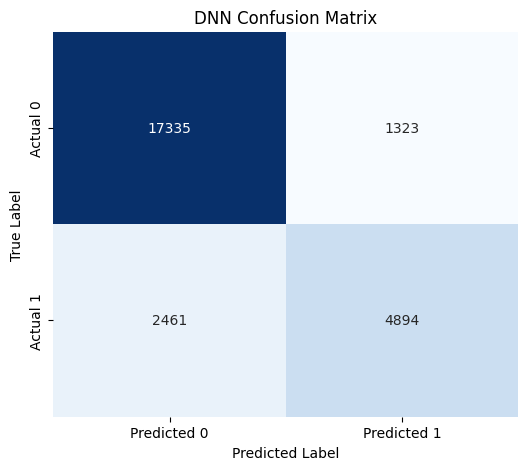


DNN Accuracy: 0.8545

DNN Area Under Curve (AUC): 0.9133


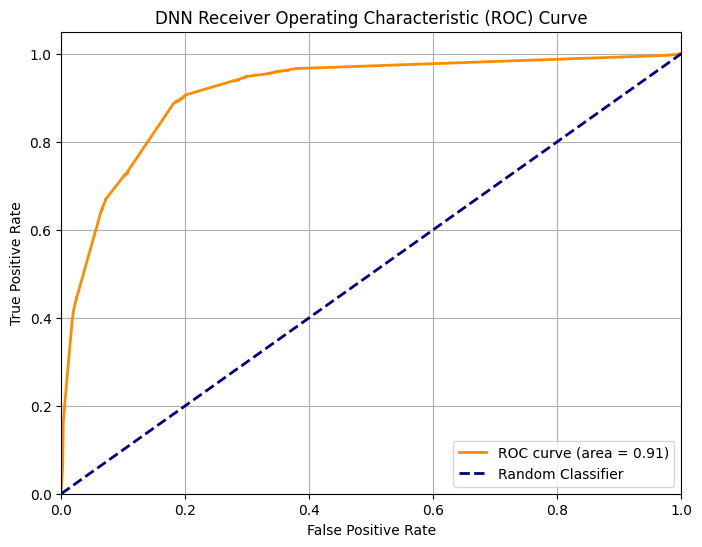

In [11]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set model to evaluation mode
model.eval()

all_labels = []
all_preds = []
all_probas = []

with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)

        # Apply sigmoid to get probabilities for binary classification
        probas = torch.sigmoid(outputs)
        predicted_labels = (probas >= 0.5).float()

        all_labels.append(labels.cpu().numpy())
        all_preds.append(predicted_labels.cpu().numpy())
        all_probas.append(probas.cpu().numpy())

# Concatenate all predictions and labels
all_labels = np.concatenate(all_labels).flatten()
all_preds = np.concatenate(all_preds).flatten()
all_probas = np.concatenate(all_probas).flatten()

# 1. Confusion Matrix
conf_matrix_dnn = confusion_matrix(all_labels, all_preds)
print("DNN Confusion Matrix:")
print(conf_matrix_dnn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dnn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy_dnn = accuracy_score(all_labels, all_preds)
print(f"\nDNN Accuracy: {accuracy_dnn:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(all_labels, all_probas)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

print(f"\nDNN Area Under Curve (AUC): {roc_auc_dnn:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dnn, tpr_dnn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

Starting DNN (ReLU) training...
Epoch [1/50], Loss: 0.3877
Epoch [2/50], Loss: 0.2848
Epoch [3/50], Loss: 0.2762
Epoch [4/50], Loss: 0.2718
Epoch [5/50], Loss: 0.2677
Epoch [6/50], Loss: 0.2644
Epoch [7/50], Loss: 0.2612
Epoch [8/50], Loss: 0.2600
Epoch [9/50], Loss: 0.2583
Epoch [10/50], Loss: 0.2567
Epoch [11/50], Loss: 0.2537
Epoch [12/50], Loss: 0.2526
Epoch [13/50], Loss: 0.2508
Epoch [14/50], Loss: 0.2492
Epoch [15/50], Loss: 0.2484
Epoch [16/50], Loss: 0.2470
Epoch [17/50], Loss: 0.2464
Epoch [18/50], Loss: 0.2446
Epoch [19/50], Loss: 0.2442
Epoch [20/50], Loss: 0.2429
Epoch [21/50], Loss: 0.2421
Epoch [22/50], Loss: 0.2414
Epoch [23/50], Loss: 0.2410
Epoch [24/50], Loss: 0.2399
Epoch [25/50], Loss: 0.2385
Epoch [26/50], Loss: 0.2383
Epoch [27/50], Loss: 0.2378
Epoch [28/50], Loss: 0.2375
Epoch [29/50], Loss: 0.2367
Epoch [30/50], Loss: 0.2369
Epoch [31/50], Loss: 0.2358
Epoch [32/50], Loss: 0.2358
Epoch [33/50], Loss: 0.2343
Epoch [34/50], Loss: 0.2349
Epoch [35/50], Loss: 0.23

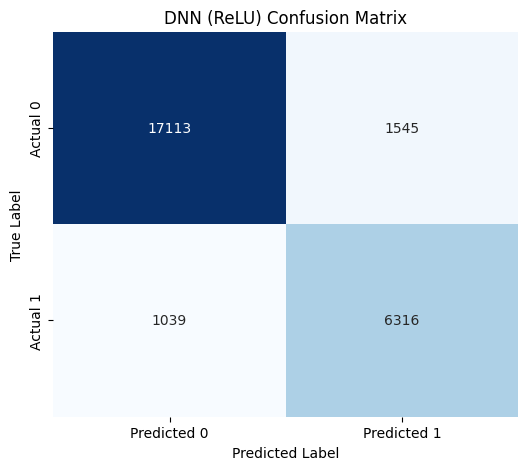


DNN (ReLU) Accuracy: 0.9007

DNN (ReLU) Area Under Curve (AUC): 0.9593


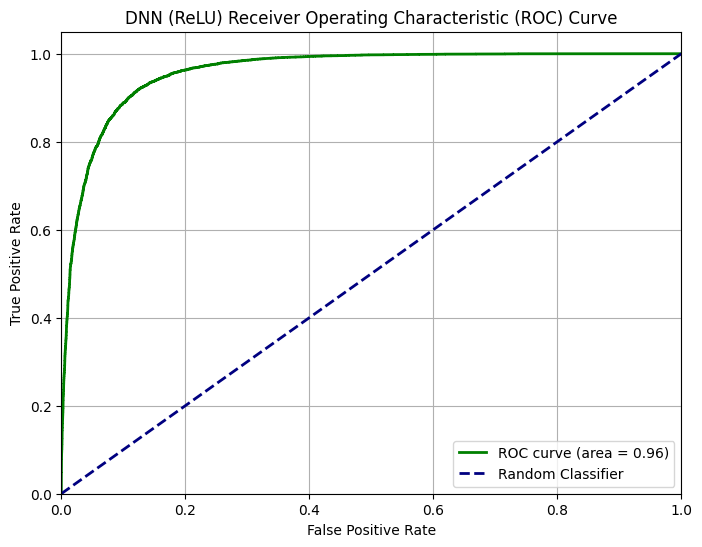

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Deep Neural Network with ReLU activations
class DNN_ReLU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNN_ReLU, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU() # Changed from Tanh
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU() # Changed from Tanh
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU() # Changed from Tanh
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x) # Still no activation here for BCEWithLogitsLoss
        return x

# Initialize the network with ReLU
model_relu = DNN_ReLU(input_size, hidden_size, output_size)

# Define Loss Function and Optimizer (same as before)
criterion_relu = nn.BCEWithLogitsLoss()
optimizer_relu = optim.SGD(model_relu.parameters(), lr=0.01)

# Training loop
num_epochs = 50

print("Starting DNN (ReLU) training...")
for epoch in range(num_epochs):
    model_relu.train() # Set model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer_relu.zero_grad() # Zero the parameter gradients
        outputs = model_relu(inputs)
        loss = criterion_relu(outputs, labels)
        loss.backward() # Backpropagation
        optimizer_relu.step() # Update weights
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

print("DNN (ReLU) training complete!")

# --- Performance Assessment for DNN with ReLU ---
print("\nAssessing DNN (ReLU) performance...")
model_relu.eval()

all_labels_relu = []
all_preds_relu = []
all_probas_relu = []

with torch.no_grad(): # Disable gradient calculation for evaluation
    for inputs, labels in test_loader:
        outputs = model_relu(inputs)
        probas = torch.sigmoid(outputs)
        predicted_labels = (probas >= 0.5).float()

        all_labels_relu.append(labels.cpu().numpy())
        all_preds_relu.append(predicted_labels.cpu().numpy())
        all_probas_relu.append(probas.cpu().numpy())

# Concatenate all predictions and labels
all_labels_relu = np.concatenate(all_labels_relu).flatten()
all_preds_relu = np.concatenate(all_preds_relu).flatten()
all_probas_relu = np.concatenate(all_probas_relu).flatten()

# 1. Confusion Matrix
conf_matrix_relu = confusion_matrix(all_labels_relu, all_preds_relu)
print("DNN (ReLU) Confusion Matrix:")
print(conf_matrix_relu)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_relu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('DNN (ReLU) Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Accuracy Score
accuracy_relu = accuracy_score(all_labels_relu, all_preds_relu)
print(f"\nDNN (ReLU) Accuracy: {accuracy_relu:.4f}")

# 3. ROC curve and 4. Area Under Curve (AUC)
fpr_relu, tpr_relu, thresholds_relu = roc_curve(all_labels_relu, all_probas_relu)
roc_auc_relu = auc(fpr_relu, tpr_relu)

print(f"\nDNN (ReLU) Area Under Curve (AUC): {roc_auc_relu:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_relu, tpr_relu, color='green', lw=2, label=f'ROC curve (area = {roc_auc_relu:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN (ReLU) Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()